#Imports

In [21]:
import pandas as pd
import numpy as np
from numpy.linalg import eig
import matplotlib .pyplot as plt
import math

In [13]:
#importing the data
df = pd.read_csv('Dataset.csv', names=['x','y'])


In [14]:
#organising the data
data = np.array([df['x'],df['y']])

In [15]:
#centering
mean_x = np.sum(data[0])/1000
mean_y = np.sum(data[1])/1000

data[0] = np.subtract(data[0], mean_x)
data[1] = np.subtract(data[1], mean_y)

In [16]:
#calculating C: the covariance matrix
c = np.cov(data)

#eigen decompose c
eigenvalues, eigenvectors = eig(c)
eigenvectors = eigenvectors.transpose()


In [17]:
#picking the maximum eigen value and corresponding eigen vector
indexes = np.argsort(eigenvalues)
max_index = indexes[len(indexes)-1]
second_max_index = indexes[len(indexes)-2]

#lambda_1 is the maximum eigen value
lambda_1 = eigenvalues[max_index]

#w_1 is the eigen vector corresponding to lambda_1 
w_1 = eigenvectors[max_index]

#lambda_2 is the maximum eigen value
lambda_2 = eigenvalues[second_max_index]

#w_2 is the eigen vector corresponding to lambda_2
w_2 = eigenvectors[second_max_index]

#variance explained by eigen value
var_1 = (lambda_1*100)/np.sum(eigenvalues)
#variance explained by eigen value
var_2 = (lambda_2*100)/np.sum(eigenvalues)

print(var_1)
print(var_2)


54.17802452885223
45.82197547114777


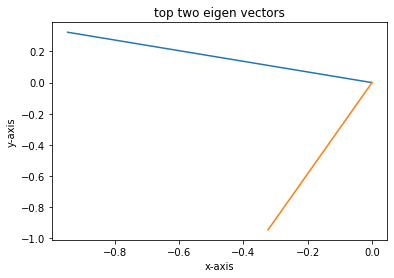

0.0


In [22]:
#plotting vectors
plt.title("top two eigen vectors")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot([0, w_2[0]], [0, w_2[1]])
plt.plot([0, w_1[0]], [0, w_1[1]])
plt.show()
print(np.matmul(w_1.transpose(), w_2)) #cross-checking for orthogonality

In [19]:
#calculating the projections
scalar = np.matmul(data.transpose(), w_1)  

projections_1 = np.empty([1000, 2])
for i in range(0,1000):
        projections_1[i] = w_1*scalar[i];

projections_1 = projections_1.transpose()

scalar = np.matmul(data.transpose(), w_2)  

projections_2 = np.empty([1000, 2])
for i in range(0,1000):
        projections_2[i] = w_2*scalar[i];

projections_2 = projections_2.transpose()


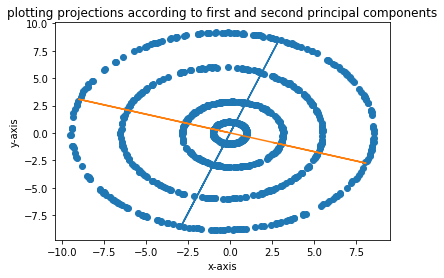

In [20]:
plt.title("plotting projections according to first and second principal components")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.scatter(df['x'], df['y'])
plt.plot(projections_1[0], projections_1[1])
plt.plot(projections_2[0], projections_2[1])
plt.show()